# Credit Card Fraud Detection - Model Training

# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Features and Target

In [3]:
X = data.drop('Class', axis=1)
y = data['Class']

Scale Time and Amount features

In [4]:
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['Time','Amount']] = scaler.fit_transform(X[['Time','Amount']])

Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Random Forest + SMOTE (Supervised Classification)

handle class imbalance using SMOTE

In [8]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

Train Random Forest

In [7]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

Confusion Matrix

In [9]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:\n", cm_rf)

Random Forest Confusion Matrix:
 [[56849    15]
 [   16    82]]


Classification Report

In [10]:
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# Confusion Matrix

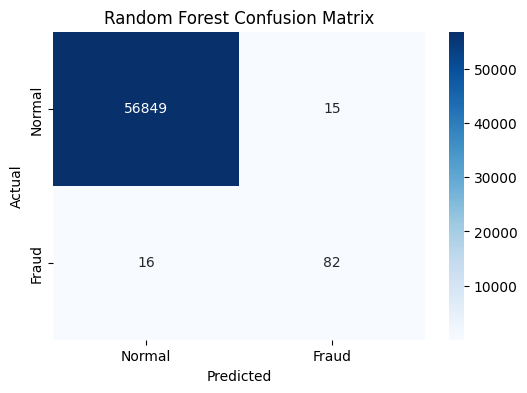

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Random Forest Confusion Matrix")
plt.show()

# K-Means Anomaly Detection

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

Map clusters to fraud/normal based on majority class

In [13]:
cluster_map = {}
for cluster in np.unique(labels):
    mask = labels == cluster
    counts = y[mask].value_counts()
    cluster_map[cluster] = counts.idxmax()

Convert cluster labels to predicted class

In [14]:
y_pred_kmeans = np.array([cluster_map[label] for label in labels])

Confusion Matrix

In [15]:
cm_km = confusion_matrix(y, y_pred_kmeans)
print("\nK-Means Confusion Matrix:\n", cm_km)


K-Means Confusion Matrix:
 [[284315      0]
 [   492      0]]


In [16]:
cm_km = confusion_matrix(y, y_pred_kmeans)
print("\nK-Means Confusion Matrix:\n", cm_km)


K-Means Confusion Matrix:
 [[284315      0]
 [   492      0]]


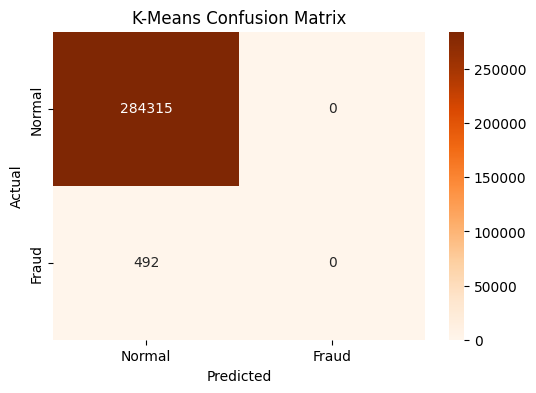

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_km, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("K-Means Confusion Matrix")
plt.show()